In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTEN

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('./Data_Science_Internship - Dump.csv')

# Setting coulumns with None value to None 
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan)

# Droping rows where status is not LOST or WON
df = df[(df['status'] == 'WON') | (df['status'] == 'LOST')]

df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [3]:
df.shape

(46317, 15)

In [4]:
df.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

## Data Analysis and Cleaning

In [5]:
# Finding missing values and there percentage in the dataset

missing_values = df.isnull().sum()
missing_percent = round((df.isnull().sum()/df.shape[0])*100, 2)
missing_data = pd.concat([missing_values, missing_percent], axis=1, keys=['Missing Values', 'Percentage'])
print(missing_data)

                Missing Values  Percentage
Agent_id                     0        0.00
status                       0        0.00
lost_reason               3073        6.63
budget                    3694        7.98
lease                     2336        5.04
movein                   13610       29.38
source                    5951       12.85
source_city               8831       19.07
source_country            8622       18.62
utm_source                  61        0.13
utm_medium                3184        6.87
des_city                  2529        5.46
des_country               2529        5.46
room_type                23491       50.72
lead_id                      0        0.00


In [6]:
"""
    Calculating the percentage of null values in case when status is WON and when status is LOSE
"""

df_won = df[df['status'] == 'WON']
df_lost = df[df['status'] == 'LOST']

x = round(df_won.isnull().sum() * 100 / len(df_won), 2)
y = round(df_lost.isnull().sum() * 100 / len(df_lost), 2)


percentage_null_values = pd.concat([x, y], axis = 1)
percentage_null_values.columns = ['Winning Null (%)', 'Losing Null (%)']
percentage_null_values

,Winning Null (%),Losing Null (%)
Agent_id,0.00,0.00
status,0.00,0.00
lost_reason,100.00,0.00
budget,2.57,8.36
lease,1.82,5.27
movein,20.53,30.01
source,5.53,13.37
source_city,17.83,19.15
source_country,17.67,18.68
utm_source,0.10,0.13


<Axes: xlabel='room_type', ylabel='count'>

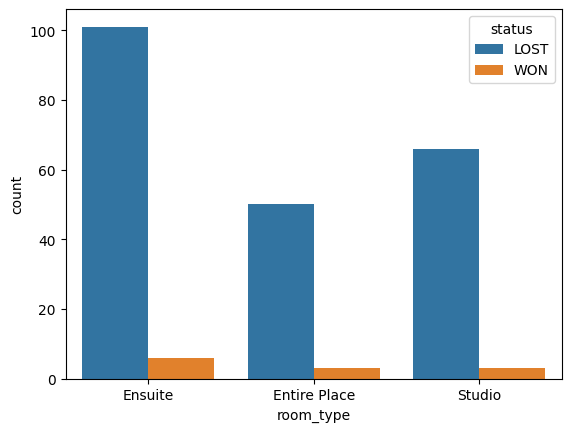

In [7]:
sns.countplot(x="room_type", data=df[0:500], hue = 'status')

In [8]:
# Filter out rows with more than 6 NaN values
# This step removes 1411 rows which have more than 6 NaN values.

df = df.dropna(thresh=df.shape[1] - 6)
df = df.reset_index(drop = True)
print(df.shape)

(44906, 15)


In [9]:
# Dropping lead_id column
df = df.drop(['lead_id'], axis = 1)
print("Column lead_id dropped successfully.")


# Dropping column room_type as it has 50 percent null values in both WON and LOSS status
df = df.drop(['room_type'], axis = 1)
print("room_type column dropped successfully.")

Column lead_id dropped successfully.
room_type column dropped successfully.


In [10]:
"""
    Dealing with missing values.
"""

# Setting null values in columns lost_reason column to 'room booked'
df['lost_reason'].fillna('room_booked', inplace = True)


# Setting a new category 'unknown' for null values
df['budget'].fillna('unknown', inplace = True)
df['lease'].fillna('unknown', inplace = True)
df['source'].fillna('unknown', inplace = True)
df['source_city'].fillna('unknown', inplace = True)
df['source_country'].fillna('unknown', inplace = True)
df['utm_source'].fillna('unknown', inplace = True)
df['utm_medium'].fillna('unknown', inplace = True)
df['des_city'].fillna('unknown', inplace = True)
df['des_country'].fillna('unknown', inplace = True)

In [11]:
# After exploring various posibilites I have decided to drop the 'movein' column, it can lead to some performance issues in our 
# model.

df = df.drop(['movein'], axis = 1)
print("movein column dropped succesfully.")

movein column dropped succesfully.


In [12]:
df.head()

,Agent_id,status,lost_reason,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country
0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
1,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
2,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Wants private accommodation,120,semester-stay,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
3,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Short stay,0-0,0,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
4,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,LOST,Wants private accommodation,£181 - £240 Per Week,51,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...


In [13]:
df.describe()

,Agent_id,status,lost_reason,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country
count,44906,44906,44906,44906,44906,44906,44906,44906,44906,44906,44906,44906
unique,120,2,31,1837,304,679,4316,185,34,61,218,15
top,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,unknown,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
freq,7725,41894,8501,9750,11000,19092,7420,18667,30873,31501,7144,41577


In [14]:
x = df.status.value_counts()

won_percentage = round(x.WON / (x.WON + x.LOST) * 100, 2)

print(f"Only {won_percentage} % of data is from WON class\nRest {100 - won_percentage} % is from LOST class")

# There is a class imbalance. 

Only 6.71 % of data is from WON class
Rest 93.29 % is from LOST class


In [15]:
# Using to 20 categories for each column
for col in df.columns:
    print(f"{col} : {len(df[col].unique())}")
    print(df[col].value_counts().head(20))
    print('\n')

Agent_id : 120
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    7725
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489    1436
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450    1243
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5    1085
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b    1031
64ce47d15992e40da1dd9e37330f1aa90bf11b5878258ae20b5ebd5c11aeb3a3     969
ab6bb4584e9946b135dca2e39d12abba3ea82d5ea927d05371cc49b0731261ca     890
8e2d91da4e36f2d82d3df133ac8f1f274430573c394b0b4a86cf18190e51cd5a     863
f11a7d64cc0201a4ba1e60e00992d074dc6c46680bb7be196073d26e53e45bf1     855
4596fcf257c4cd0393947526079ade602ea5a8a5774bf4d01f0f8da2d1bfe16a     831
18177338c3669a1314d644b7f4ecfd18a5c735e819edf1e2062c3bc354d0dd7f     823
327ec29056cc47c24bf922f7dc0f78261dad5c726d7353a4048aa730e8fabe0f     730
b5740f0e88bf42cdae45c073ea5c170e3a422dd3ec257810a29e67b5fafc40c6     726
d4192f06768ab0f257c7f5e17ad021b075b9

#### Using to 20 most occuring categories for each column for one hot encoding.

In [16]:
def one_hot_encode_top_n(df, column, n):
    """
    This function performs one hot encoding on the top n categories of a categorical variable in a pandas DataFrame.
    If there are only two categories, it drops one category.
    """
    
    # Get the frequency count of each category
    counts = df[column].value_counts()

    # Get the names of the top n categories
    top_categories = counts[:n].index.tolist()

    # If there are only two categories, drop one category
    if len(counts) == 2:
        top_categories.pop()

    # Create a new column with the top n categories and "Other"
    df['top_categories'] = df[column].apply(lambda x: x if x in top_categories else 'Other')

    # Perform one hot encoding on the top n categories
    one_hot_encoded = pd.get_dummies(df['top_categories'], prefix=column)

    # Drop the "Other" column if it was created
    otherName = f"{column}_Other"
    if otherName in one_hot_encoded.columns:
        one_hot_encoded.drop(otherName, axis=1, inplace=True)

    # Concatenate the original DataFrame and the encoded features
    encoded_df = pd.concat([df, one_hot_encoded], axis=1)

    # Drop the original categorical variable and the "top_categories" column
    encoded_df.drop([column, 'top_categories'], axis=1, inplace=True)

    return encoded_df


In [17]:
def one_hot_encode_all(df, n):

    # Identify categorical columns
    categorical_cols = df.columns

    # Apply one hot encoding to each categorical column
    encoded_df = df.copy()
    for col in categorical_cols:
        encoded_df = one_hot_encode_top_n(encoded_df, col, n)

    return encoded_df

df_encoded = one_hot_encode_all(df, 20)

print(df_encoded.shape)

(44906, 215)


In [18]:
X = df_encoded.drop(['status_LOST'], axis = 1)
y = df_encoded[['status_LOST']]

In [19]:
X.shape, y.shape

((44906, 214), (44906, 1))

## Handling class imbalance

I am using SMOTEN (Synthetic Minority Over-sampling Technique for Nominal) model for oversampling.

In [20]:
sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X, y)

In [21]:
# Created synthetic entry for signal WON, now each class has 41894 rows each

test = pd.concat([X_res, y_res], axis = 1)
test[test['status_LOST'] == 1].shape, test[test['status_LOST'] == 0].shape

((41894, 215), (41894, 215))

In [22]:
X_res.shape, y_res.shape

((83788, 214), (83788, 1))

In [23]:
# Using chi2 selector for selecting top 50 features.

selector = SelectKBest(chi2, k=50)
X_new = selector.fit_transform(X_res, y_res)

In [24]:
for i in range(len(selector.scores_)):
    print('Feature %d: %f' % (i, selector.scores_[i])) 

Feature 0: 96.135524
Feature 1: 61.881188
Feature 2: 67.207792
Feature 3: 525.633782
Feature 4: 461.122734
Feature 5: 361.053985
Feature 6: 7725.000000
Feature 7: 540.252055
Feature 8: 32.738815
Feature 9: 63.570008
Feature 10: 509.141780
Feature 11: 698.997936
Feature 12: 312.559776
Feature 13: 81.565117
Feature 14: 655.838202
Feature 15: 343.299135
Feature 16: 194.604520
Feature 17: 766.557711
Feature 18: 348.669647
Feature 19: 788.594470
Feature 20: 606.000000
Feature 21: 351.000000
Feature 22: 671.000000
Feature 23: 785.000000
Feature 24: 595.000000
Feature 25: 1223.000000
Feature 26: 8501.000000
Feature 27: 5319.000000
Feature 28: 480.000000
Feature 29: 1460.000000
Feature 30: 324.000000
Feature 31: 6347.000000
Feature 32: 7668.000000
Feature 33: 310.000000
Feature 34: 382.000000
Feature 35: 810.000000
Feature 36: 2236.000000
Feature 37: 512.000000
Feature 38: 2713.000000
Feature 39: 41894.000000
Feature 40: 1282.065664
Feature 41: 1070.035132
Feature 42: 326.793103
Feature 43: 41

In [25]:
X_new.shape

(83788, 50)

## Training the model

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_res, test_size=0.33, random_state=42)

In [53]:
X_train.shape, y_test.shape

((56137, 50), (27651, 1))

In [54]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
y_pred = classifier.predict(X_test)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

E:\CODE\MachineLearning\uniacco-datascience\env\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [47]:
y_pred_knn = knn.predict(X_test)

## Evaluating

In [48]:
# Confusion matrix for knn
print(confusion_matrix(y_test, y_pred_knn))

[[  868   126]
 [   23 13802]]


In [56]:
# Confusion matrix for Decision Tree
print(confusion_matrix(y_test, y_pred))

[[13853     0]
 [    0 13798]]


In [50]:
# classification report for Decision Tree
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       1.00      1.00      1.00     13825

    accuracy                           1.00     14819
   macro avg       1.00      1.00      1.00     14819
weighted avg       1.00      1.00      1.00     14819



In [51]:
print('F1 Score knn             : {:.3f}'.format(f1_score(y_test, y_pred_knn)))
print('F1 Score Decision Tree   : {:.3f}'.format(f1_score(y_test, y_pred)))

F1 Score knn             : 0.995
F1 Score Decision Tree   : 1.000


## Observations

The model seems to be performing exceptionally well, it may be overfitted.